# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
 77% 4.00M/5.21M [00:00<00:00, 5.96MB/s]
100% 5.21M/5.21M [00:01<00:00, 5.43MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_O

## Import Libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import matplotlib.pyplot as plt


## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [4]:
training_path = '/content/ParkingLot_Occupation/train'
test_path = '/content/ParkingLot_Occupation/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=.15,
    horizontal_flip = True,
)
test_datagen = ImageDataGenerator(rescale=1./255)

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [5]:
training_generator = train_datagen.flow_from_directory(
    training_path,
    target_size= (64, 64),
    batch_size=32,
    subset='training',
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    training_path,
    target_size= (64, 64),
    batch_size=32,
    subset='validation',
    class_mode='binary'
)

testing_generator = test_datagen.flow_from_directory(
    training_path,
    target_size= (64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 1175 images belonging to 2 classes.
Found 207 images belonging to 2 classes.
Found 1382 images belonging to 2 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [6]:
model = Sequential([
    Input(shape=(64, 64 , 3)),
    Conv2D(64,(3, 3),activation='relu',padding='same'),
    MaxPooling2D(2,2),
    Conv2D(64,(3, 3),activation='relu',padding='same'),
    MaxPooling2D(2,2),
    Flatten(),

    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,048,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,087,425 (4.15 MB)

 Trainable params: 1,087,425 (4.15 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [7]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3, #made it 3 just for test
    restore_best_weights=True
)

In [8]:
history = model.fit(training_generator,
          epochs=15,
          batch_size=16,
          validation_data=validation_generator,
          callbacks=early_stopping
          )

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 448ms/step - accuracy: 0.7692 - loss: 0.4810 - val_accuracy: 0.8019 - val_loss: 0.7507
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 418ms/step - accuracy: 0.9036 - loss: 0.2423 - val_accuracy: 0.9324 - val_loss: 0.1566
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 495ms/step - accuracy: 0.9695 - loss: 0.0991 - val_accuracy: 0.9710 - val_loss: 0.0977
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 22s 518ms/step - accuracy: 0.9541 - loss: 0.1198 - val_accuracy: 0.9807 - val_loss: 0.0663
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 510ms/step - accuracy: 0.9629 - loss: 0.1097 - val_accuracy: 0.8889 - val_loss: 0.3194
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 21s 514ms/step - accuracy: 0.9470 - loss: 0.1767 - val_accuracy: 0.9517 - val_loss: 0.1133
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 472ms/step - accuracy: 0.9654 - loss: 0.0834 - val_accuracy: 0.9758 - val_loss: 0.0950


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [9]:
model.evaluate(training_generator)

37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.9658 - loss: 0.0933


[0.09735115617513657, 0.9634042382240295]

In [10]:
model.evaluate(validation_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9705 - loss: 0.0786


[0.09935455769300461, 0.9613526463508606]

In [11]:
model.evaluate(testing_generator)

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9634 - loss: 0.0992


[0.08799518644809723, 0.9688856601715088]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [45]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

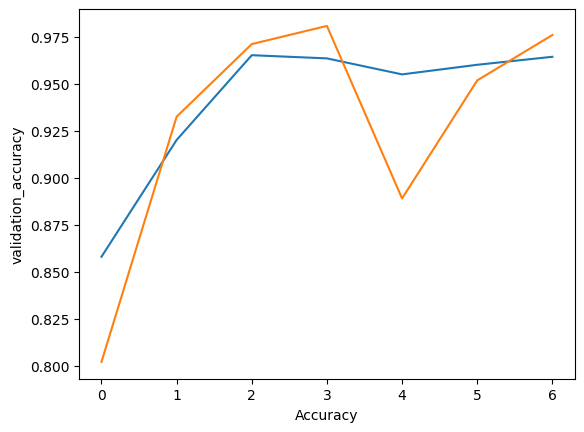

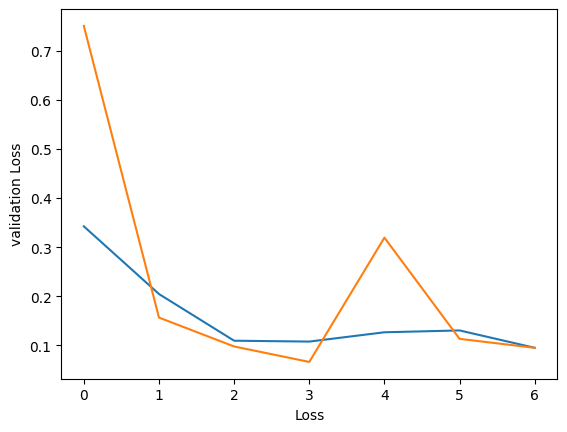

In [12]:
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss = history.history['loss']
loss_val = history.history['val_loss']

plt.plot(acc)
plt.plot(acc_val)
plt.xlabel('Accuracy')
plt.ylabel('validation_accuracy')
plt.show()

plt.xlabel('Loss')
plt.ylabel('validation Loss')
plt.plot(loss)
plt.plot(loss_val)
plt.show()


## Save the Model
Save the trained CNN model for submission.

In [13]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1. for augmentation - i augmented more becuase the data is simple and the training adentify the image faster

2. used 1 input layer with the images shape 2 conv2d layer all of them 64 units and two maxpooling with one hidden layer and binary output

why i made the model like this,
 because i made the model from one conv2d layer and added units and layers based on the training  

3. used relu because it will not make the output negative

4. tried changing in epochs but i made it to 15 because  when i try to change the epochs it wont make any difference becuase i added a callback it always stops between 5 - 10 that because i made the patience on 3 (i know it good to make it between 7-10 but because of the processing power and i tried to train it on different number)

5. used accuracy metrics so it shows me the accuracy per iteration

6. didn't use dropout because my accuracy is already high and i need to increase the epochs and batch+ and it will take time to train it

7. used model.evaluate it shows me the accuracy and the losses for the training and testing and i can determine if there's overfitting or underfitting or just fitting (it's just fitting)

8. the visuals shows the accuracy and the loss per iteration and that the model is just fitting

9. in the 4th iteration it happened to lead to overfitting but the next iteration trained and it became just fiting